In [6]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/workspaces/codespaces-blank
/workspaces


# Group Details

**Group ID:** 6 

**Group name:** hdn456, zxw463, fzt420

**Group members that contributed to the assignment (full name):** Simon Wissendorff Seheim, Said Djafar Said, Kristian Rentillo Jelsted


# Part 1


Consider the following activities extracted from the Dreyers log introduced and examined in the paper The Analysis of a Real Life Declarative Process:

```python
Fill out application
Architect Review
Lawyer Review
Reject
Applicant informed
Change phase to Abort
Change Phase to Payout
First payment
Undo payment 
Change Phase to End Report
Account number changed
Approve changed account 
Execute abandon
Change phase to Abandon
```


## Task 1


Using these activities, model a simple workflow of an application process as a Petri net. It does not need to follow exactly the process as described in the paper and you may add additional details yourself, but you should ensure that your process captures at least the following rules:

1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

Create a copy of your Petrinet with one additional rule:

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.

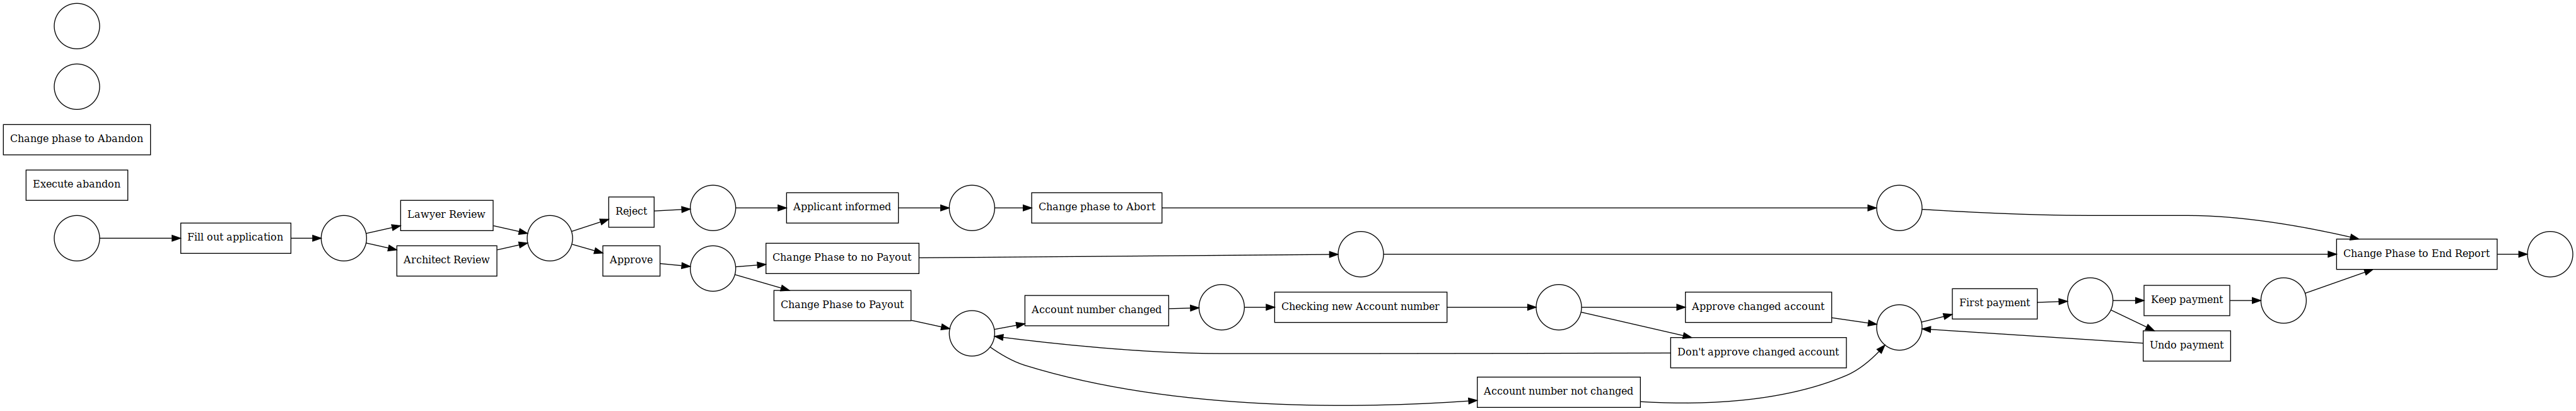

In [7]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Create a Petri net
net = PetriNet("petri_net_rules_1_to_8")

# Create transitions
t_fill_out_application = PetriNet.Transition("t_fill_out_application", "Fill out application")
t_architect_review = PetriNet.Transition("t_architect_review", "Architect Review")
t_lawyer_review = PetriNet.Transition("t_lawyer_review", "Lawyer Review")
t_reject = PetriNet.Transition("t_reject", "Reject")
t_approve = PetriNet.Transition("t_approve", "Approve")
t_applicant_informed = PetriNet.Transition("t_applicant_informed", "Applicant informed")
t_change_phase_to_abort = PetriNet.Transition("t_change_phase_to_abort", "Change phase to Abort")
t_change_phase_to_payout = PetriNet.Transition("t_change_phase_to_payout", "Change Phase to Payout")
t_change_phase_to_no_payout = PetriNet.Transition("t_change_phase_to_no_payout", "Change Phase to no Payout")
t_first_payment = PetriNet.Transition("t_first_payment", "First payment")
t_keep_payment = PetriNet.Transition("t_keep_payment", "Keep payment")
t_undo_payment = PetriNet.Transition("t_undo_payment", "Undo payment")
t_change_phase_to_end_report = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")
t_account_number_changed = PetriNet.Transition("t_account_number_changed", "Account number changed")
t_account_number_not_changed = PetriNet.Transition("t_account_number_not_changed", "Account number not changed")
t_account_new_number = PetriNet.Transition('t_account_new_number','Checking new Account number')
t_approve_changed_account = PetriNet.Transition("t_approve_changed_account", "Approve changed account")
t_no_approve_changed_account = PetriNet.Transition("t_no_approve_changed_account", "Don't approve changed account")
t_execute_abandon = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_change_phase_to_abandon = PetriNet.Transition("t_change_phase_to_abandon", "Change phase to Abandon")


net.transitions.add(t_fill_out_application)
net.transitions.add(t_architect_review)
net.transitions.add(t_lawyer_review)
net.transitions.add(t_reject)
net.transitions.add(t_approve)
net.transitions.add(t_applicant_informed)
net.transitions.add(t_change_phase_to_abort)
net.transitions.add(t_change_phase_to_payout)
net.transitions.add(t_change_phase_to_no_payout)
net.transitions.add(t_first_payment)
net.transitions.add(t_undo_payment)
net.transitions.add(t_keep_payment)
net.transitions.add(t_change_phase_to_end_report)
net.transitions.add(t_account_number_changed)
net.transitions.add(t_account_number_not_changed)
net.transitions.add(t_account_new_number)
net.transitions.add(t_approve_changed_account)
net.transitions.add(t_no_approve_changed_account)
net.transitions.add(t_execute_abandon)
net.transitions.add(t_change_phase_to_abandon)

amount = 14

# Create places
pList = {}
for x in range(1,18):
  pList[f'p{x}'] = PetriNet.Place(f'p{x}')
  net.places.add(pList[f'p{x}'])  



# Create arcs
petri_utils.add_arc_from_to(pList['p1'], t_fill_out_application, net)
petri_utils.add_arc_from_to(t_fill_out_application, pList['p2'], net)

#First or-split 
petri_utils.add_arc_from_to(pList['p2'],t_lawyer_review, net)
petri_utils.add_arc_from_to(pList['p2'],t_architect_review, net)

#First or-join
petri_utils.add_arc_from_to(t_lawyer_review,pList['p3'], net)
petri_utils.add_arc_from_to(t_architect_review,pList['p3'], net)

#Northeren part of the process, from q4 all the way to the final place
petri_utils.add_arc_from_to(pList['p3'],t_reject, net)

petri_utils.add_arc_from_to(t_reject,pList['p4'], net)

petri_utils.add_arc_from_to(pList['p4'],t_applicant_informed, net)

petri_utils.add_arc_from_to(t_applicant_informed,pList['p5'],net)

petri_utils.add_arc_from_to(pList['p5'],t_change_phase_to_abort,net)

petri_utils.add_arc_from_to(t_change_phase_to_abort,pList['p6'], net)

petri_utils.add_arc_from_to(pList['p6'],t_change_phase_to_end_report, net)

petri_utils.add_arc_from_to(t_change_phase_to_end_report,pList['p7'], net)


#Continue the 2nd or-split in the southeren bit

petri_utils.add_arc_from_to(pList['p3'],t_approve, net)

petri_utils.add_arc_from_to(t_approve,pList['p8'], net)

petri_utils.add_arc_from_to(pList['p8'],t_change_phase_to_payout, net)

petri_utils.add_arc_from_to(pList['p8'],t_change_phase_to_no_payout, net)

petri_utils.add_arc_from_to(t_change_phase_to_no_payout, pList['p9'],net)

petri_utils.add_arc_from_to(pList['p9'],t_change_phase_to_end_report, net)

petri_utils.add_arc_from_to(t_change_phase_to_payout,pList['p10'], net)

petri_utils.add_arc_from_to(pList['p10'],t_account_number_changed,net)

petri_utils.add_arc_from_to(pList['p10'],t_account_number_not_changed,net)

petri_utils.add_arc_from_to(t_account_number_not_changed,pList['p11'],net)

petri_utils.add_arc_from_to(pList['p11'],t_first_payment,net)

petri_utils.add_arc_from_to(t_first_payment,pList['p17'],net)

petri_utils.add_arc_from_to(pList['p17'],t_keep_payment,net)

petri_utils.add_arc_from_to(t_keep_payment,pList['p12'],net)

petri_utils.add_arc_from_to(pList['p17'],t_undo_payment,net)

petri_utils.add_arc_from_to(t_undo_payment,pList['p11'],net)

petri_utils.add_arc_from_to(pList['p12'],t_change_phase_to_end_report,net)

petri_utils.add_arc_from_to(t_account_number_changed,pList['p13'],net)

petri_utils.add_arc_from_to(pList['p13'],t_account_new_number,net)

petri_utils.add_arc_from_to(t_account_new_number,pList['p14'],net)

petri_utils.add_arc_from_to(pList['p14'],t_no_approve_changed_account,net)

petri_utils.add_arc_from_to(t_no_approve_changed_account,pList['p10'],net)

petri_utils.add_arc_from_to(pList['p14'],t_approve_changed_account,net)

petri_utils.add_arc_from_to(t_approve_changed_account,pList['p11'],net)

# Initial and final markings
initial_marking = Marking()
initial_marking['p1'] = 1

final_marking = Marking()
final_marking['p7'] = 1

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

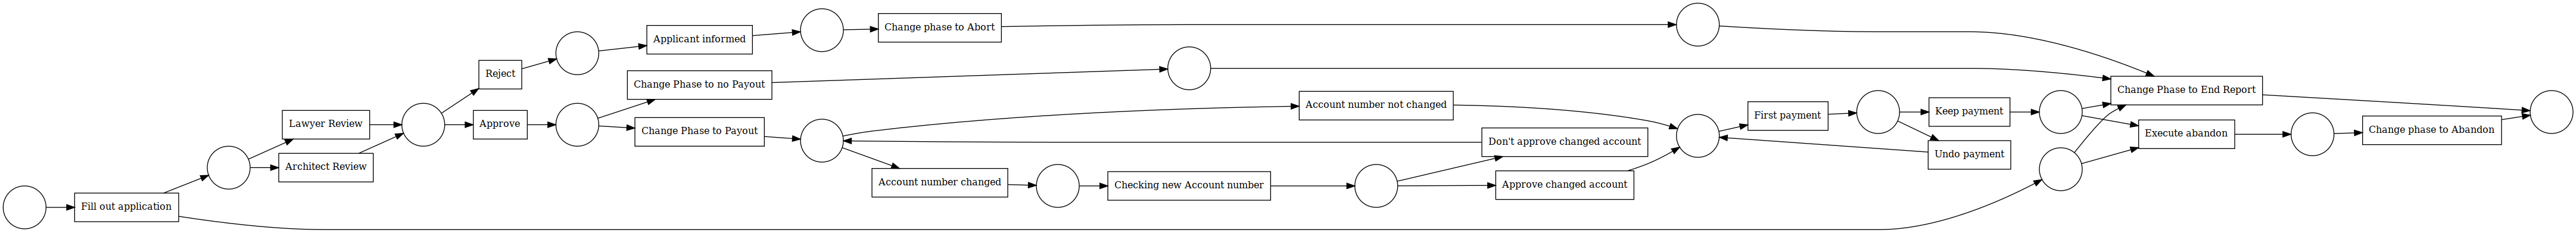

In [8]:
#Add rule 9 to the Petri net
# TODO
#Establishing the abandon
petri_utils.add_arc_from_to(t_fill_out_application,pList['p15'],net)
petri_utils.add_arc_from_to(pList['p15'],t_execute_abandon,net)
petri_utils.add_arc_from_to(pList['p15'],t_change_phase_to_end_report,net)
petri_utils.add_arc_from_to(t_execute_abandon,pList['p16'],net)
petri_utils.add_arc_from_to(pList['p16'],t_change_phase_to_abandon,net)
petri_utils.add_arc_from_to(t_change_phase_to_abandon,pList['p7'],net)
petri_utils.add_arc_from_to(pList['p12'],t_execute_abandon,net)




# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Task 2


For each rule describe how the rule is implemented (as a short paragraph for each rule).

**Rule 1** 

The first thing to always happen is Fill out application.

**Rule 2**

The is done by having both occur in sequence after rule 1 (and is implemented using rule 3).
  
**Rule 3**

After Rule 1, an or-split is implemented ensuring only one of the things happen.

**Rule 4**

Reject is implemented together with the added 'accept' in an or-split. From Reject the sequence consist of Applicant informed as well as Change phase to Abort.

**Rule 5**

By putting an or-split after the place after First payment, it's possible to undo the payment and loop back to first payment or continue along the process. 

**Rule 6**

To make sure First payment doesn't happen if account number changed, an or-split is created to distinguish between going to payment or having to update the changed account number, which then can be approved, making it possible to first payment. If not approved, the proccess then loops back to either changing to a new number or not changing the account number.

**Rule 7**

To follow this rule, both rules 5 and 6 only occur if Change Phase to Payout happens in an or-split after the Approve transition.

**Rule 8**

The other possible transition in the beforementioned or-split is called Change Phase to no Payment, from where it's possible to go to the transition Change Phase to End Report. That very same transition is the or-join of the branch created from wanting to pay, which ends with the First payment transition. Thereby it's only possible to either skip paying and ending or paying and eventually ending. But not possible to change once paying or not paying is decided.

**Rule 9**

By creating an and-split after the transition Fill out Application, one token is consumed by Fill out Application and two new are created, one heading onwards all the rules explained above, and one lying in wait before an or-split. This or-split is results in the token either going to Execute abandon which ends up at final end marking or goes towards the resulting Change Phase to End which is where all other runs end up. Thereby making it so Abandoning is always possible as long as the end marking hasn't been reached. 


## Task 3

Answer the following questions and add a short (1 paragraph) argument for your answer:

**Is your Petri net live and/or quasi-live?**

From the starting marking the petri net is quasi live. 

**Is your Petri net bounded and/or safe?**

It is 1-bounded as only one token can be at any marking in the entire process. It is therefore also safe to assume that it is, well yeah, safe. Since only 1 and-split occurs (only once is 1 token consumed and 2 are being output) and that one split only joins back up again at the near final marking, nowhere is it then possible for two tokens to occupy the same spot.  

**Is your Petri net a WorkFlow net?**

Yes, because we have a clear start and a clear end, where our places and transitions are on the path from the start to the end.


# Part 2: Modelling Event Patterns as DCR Graphs

## Task 1

Model the rules from part 1 as individual DCR Graphs. (Yielding 9 graphs in total.)  Write a short description for each explaining the semantics. For convenience you may want to use an “other” event in some of your models that represents all events not explicitly mentioned.

In [9]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()


def rule_1_2_3():
    graph.excludes['Fill out application'] ={'Fill out application'}
    graph.conditions['Architect Review'] ={'Fill out application'}
    graph.conditions['Lawyer Review'] ={'Fill out application'}
    graph.excludes['Architect Review'] ={'Lawyer Review'}
    graph.excludes['Lawyer Review'] ={'Architect Review'}

def rule_4():
    graph.conditions['Applicant informed' ]={'Reject'}
    graph.conditions['Change phase to Abort']={'Applicant informed'}
    

def rule_5():
    graph.responses['Undo payment']={'First payment'}
    graph.includes['Undo payment']={'First payment'}
    graph.includes['First payment']={'Undo payment'}
    graph.excludes['First payment']={'First payment'}
    graph.excludes['Undo payment']={'Undo payment'}

def rule_6():
    graph.conditions['Approve changed account']={'Account number changed'}
    graph.conditions['First payment'] ={'Approve changed account'}

def rule_7():
    graph.conditions['First payment']={'Change Phase to Payout'}

def rule_8(Other2,Other1):
    graph.conditions['Change phase to Payout']={Other1}
    graph.conditions[Other2]={Other1}
    graph.excludes[Other2]={'Change phase to Payout'}
    graph.excludes['Change phase to Payout']={Other2}
    graph.conditions['First payment']={'Change phase to Payout'}   
    graph.conditions['Change Phase to End Report']={'First payment',Other2} 

def rule_9(Other):
    graph.excludes[Other]={'Change phase to Abandon'}
    graph.excludes['Change phase to Abandon']={Other}
    graph.conditions['Change phase to Abandon']={'Execute abandon'}

def ShowGraph():
    rule_1_2_3()
    rule_4()
    rule_6()
    rule_5()
    rule_7()
    rule_8('Other 2','Other 1')
    rule_9('Other')
    pm4py.view_dcr(graph)

#ShowGraph()


### Rule 1. 2. 3. (Combined)
We must do Fill Out Application before Architect Review and Lawyer Review. This done by Condition Relation / Orange arrow. Exclusion Relation on Fill Out Application, ensures the process can only be done once. Architect Review removes Lawyer Review if processed first, and other way around Lawyer Review removes Architect ensuring only one of them can be procededed.

### Rule 4
Reject should always eventually be followed by Applicant informed and Change phase
to Abort. 

This is done by condition relation, which ensures firstly reject is procedded and then and only then can Applicant informed be procedded and afterwards Change phase to Abort. 

### Rule 5
First payment should only occur once, unless Undo payment is executed afterwards, in
which case it may be repeated once more. 

We ensure that first payment only occur once, by self exluding itself, but afterwards it includes the option for undo, if procedded undo includes first payment again, and self excludes itself. But also response relation, which ensures that first payment has to be procedeed again.

### Rule 6 
If Account number changed happens, then afterwards Approve changed account
needs to be executed and we can no longer execute First payment until the approval has
happened. 


This is done by Condition Relation, which says that if AccountNumberChanged has to be done before we can proceed ApproveChangedAccount, which is followed by condition relation to firstpayment, which says that we must do Approve before we can proceed first payment.

### Rule 7
Change Phase to Payout should always eventually be followed by First payment. This is done by condition relation and pending response. 

A condition relation from Phase to Payout to First payment, which says that phase to payout should be procedded before First Payment, and the pending response in FIrst Payment, ensures that it runs atleast once.

### Rule 8
After Change Phase to Payout has happened, Change Phase to End Report should not
happen before we do First Payment. If Change Phase to Payout did not happen then
Change Phase to End Report is not restricted by First payment. 

Using the other1 and other2, we use condition relation, and exclude such that if Change Phase to Payout it exluces the option to go directly to Change Phase to End Report. Which ensures that we do First Payment before we go to Change Phase to End Report. This is done by condition relationship, which was described in rule 7. And if other1 is proceded and Change Phase to Payout did not happen, then Change Phase to end Report is not restricted by the exclude.

### Rule 9
Execute Abandon may happen at any time, after it is executed only Change phase to
Abandon may happen. 

The other in this schemantic is everything else. We use condition relationshap from Execute Abandon to Change phase to Abandon. And which exlucdes other, which is every other task. So only Change Phase to Abandon may happen.


## Task 2

Combine the separate patterns into a single model.

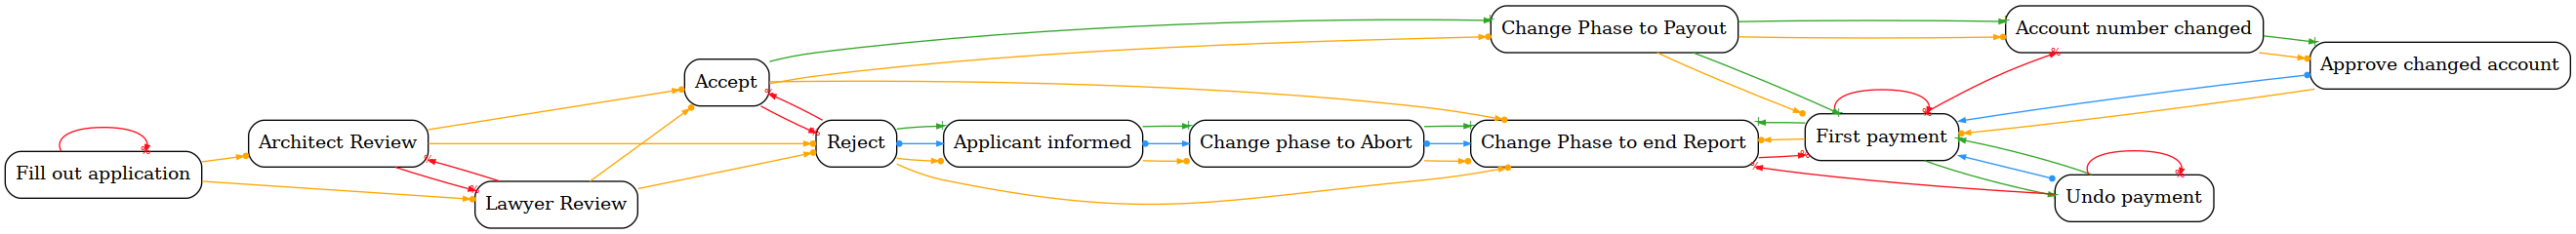

In [10]:
# Add your code here
# Add your code here
# Add your code here
# The single model containing them all starts here:
graph.excludes['Fill out application'] ={'Fill out application'}
graph.conditions['Architect Review'] ={'Fill out application'}
graph.conditions['Lawyer Review'] ={'Fill out application'}
graph.excludes['Architect Review'] ={'Lawyer Review'}
graph.excludes['Lawyer Review'] ={'Architect Review'}
graph.conditions['Reject']={'Lawyer Review','Architect Review'}
graph.conditions['Accept']={'Lawyer Review','Architect Review'}
graph.excludes['Accept']={'Reject'}
graph.excludes['Reject']={'Accept'}
graph.conditions['Change Phase to end Report']={'Accept','Reject'}
graph.conditions['Applicant informed']={'Reject'}
graph.includes['Reject']={'Applicant informed'}
graph.responses['Reject']={'Applicant informed'}

graph.conditions['Change phase to Abort']={'Applicant informed'}
graph.includes['Applicant informed']={'Change phase to Abort'}
graph.responses['Applicant informed']={'Change phase to Abort'}


graph.conditions['Change Phase to end Report']={'Change phase to Abort'}
graph.responses['Change phase to Abort']={'Change Phase to end Report'}


graph.responses['Change phase to Abort']={'Change Phase to end Report'}
graph.responses['Undo payment']={'First payment'}
graph.responses['Approve changed account']={'First payment'}
graph.includes['Account number changed']={'Approve changed account'}
graph.includes['First payment']={'Change Phase to end Report'}
graph.includes['Accept']={'Change Phase to Payout'}


graph.conditions['Change Phase to end Report']={'Reject'}

graph.conditions['Account number changed']={'Change Phase to Payout'}



graph.conditions['Account number changed']={'Approve changed account'}
graph.conditions['Change Phase to Payout']={'First payment'}
graph.conditions['Change Phase to end Report']={'First payment'}
graph.conditions['Change Phase to end Report']={'Change phase to Abort'}
graph.conditions['Change Phase to Payout']={'Accept'}
graph.includes['Change phase to Abort']={'Change Phase to end Report'}



graph.excludes['Architect Review']={'Lawyer Review'}
graph.excludes['Lawyer Review']={'Architect Review'}
graph.excludes['Undo payment']={'Change Phase to end Report'}
graph.excludes['Change Phase to end Report']={'First payment'}
graph.excludes['First payment']={'First payment'}
graph.excludes['First payment']={'Account number changed'}


graph.includes['Undo payment']={'First payment'}
graph.includes['First payment']={'Undo payment'}

graph.conditions['Account number changed']={'Change Phase to Payout'}


graph.conditions['First payment']={'Change Phase to Payout', 'Approve changed account'}
graph.includes['Change Phase to Payout']={'First payment', 'Account number changed'}



graph.conditions['Change Phase to end Report']={'Change phase to Abort','Reject','Accept', 'First payment'}
graph.excludes['Undo payment']={'Change Phase to end Report','Undo payment'}
graph.excludes['First payment']={'Account number changed','First payment'}
graph.excludes['Change Phase to end Report']={'First payment'}

graph.conditions['Approve changed account']={'Account number changed'}


graph.includes['First payment'] = {'Change Phase to end Report', 'Undo payment'}


pm4py.view_dcr(graph)

## Task 3

Answer the following questions:
**Which relations did you not use in your models?**

We did not use Milestone, Spawn and Nesting because grouping is not included in the library.

**Could some of the rules have been modelled in more than one way? If so, give one or two examples.**

Instead of having exclusion arrows pointing from 'Execute Abort' activity. We could have had two different nested processes. One with 'Fill Application' and everything that comes after, and one with 'Execute Abort' and 'Change Phase to Abort'. There would be exclusion arrows between the two processes to indicate an 'or', and this would enable us to call on the 'Execute Abort' activity anytime.



We weren't able to use the milestone in this code, but in Rule 5, instead of Undo excluding ChangePhaseToEndReport, which makes it wait for FirstPayMent to be processed, and then include ChangePhaseToEndReport again. Instead we could have had a arrow from FirstPayment to ChangePhaseToEndReport, with milestone, so ChangePhaseToEndReport wouldn't be able to proceed if FirstPayment is pending. And then we wouldn't need to use the green arrow include from firstpayment to changephasetoendreport. 

**How does your model differ from the Petri net? Do they exhibit the same language?**
Yes it does exhibit the same language, the difference lies in there being more extra places in the petri net, as we needed that to fulfill task 1. For the DCR graph, we could avoid these extra activities.
